In [1]:
import pandas as pd

In [3]:
course_name = ['Data Science', 'Machine Learning', 'Big Data', 'Data Engineer']
duration = [2,3,6,4]
df = pd.DataFrame(data = {'course_name' : course_name, 'duration' : duration})

In [4]:
df

,course_name,duration
0,Data Science,2
1,Machine Learning,3
2,Big Data,6
3,Data Engineer,4


# question 1

In [15]:
df.loc[2] 

course_name    Big Data
duration              6
Name: 2, dtype: object

# question 2
loc is label-based, which means that you have to specify rows and columns based on their row and column labels.

iloc is integer position-based, so you have to specify rows and columns by their integer position values (0-based integer position).

# question 3

In [16]:
reindex = [3,0,1,2]
new_df = df.set_index(pd.Index(reindex))
new_df

,course_name,duration
3,Data Science,2
0,Machine Learning,3
1,Big Data,6
2,Data Engineer,4


In [17]:
new_df.loc[2]

course_name    Data Engineer
duration                   4
Name: 2, dtype: object

In [18]:
new_df.iloc[2]

course_name    Big Data
duration              6
Name: 1, dtype: object

The difference between the outputs of the two functions is that loc selects data based on the labels we provide i.e reindexes whereas iloc selects data based on default python indexing.

--------------------------------------------------------------------------------------------------------------------------------------------------

In [20]:
import pandas as pd
import numpy as np
columns = ['column_1', 'column_2', 'column_3', 'column_4', 'column_5', 'column_6']
indices = [1,2,3,4,5,6]
#Creating a dataframe:
df1 = pd.DataFrame(np.random.rand(6,6), columns = columns, index = indices)

# question 4

In [21]:
df1

,column_1,column_2,column_3,column_4,column_5,column_6
1,0.817214,0.513230,0.387238,0.156140,0.821462,0.504765
2,0.576943,0.901027,0.053323,0.813007,0.251136,0.248577
3,0.904413,0.882441,0.096217,0.723558,0.879568,0.310815
4,0.296704,0.853959,0.285570,0.273227,0.570399,0.859342
5,0.648967,0.375574,0.356296,0.003198,0.579411,0.460123
6,0.442186,0.185613,0.995573,0.251537,0.170925,0.513340


1st part

In [40]:
for i in columns:
    print("The mean of", i , "is : " , df1[i].mean())

The mean of column_1 is :  0.6144045913297955
The mean of column_2 is :  0.6186406864164321
The mean of column_3 is :  0.36236973026703395
The mean of column_4 is :  0.370111110875236
The mean of column_5 is :  0.5454835884327326
The mean of column_6 is :  0.48282699317312766


2nd part

In [41]:
df1['column_2'].std()

0.30410961992793717

# question 5

In [58]:
df1.loc['2','column_2'] = "shivam"
df1.drop(2 , axis = 1)

,column_1,column_2,column_3,column_4,column_5,column_6
1,0.817214,0.51323,0.387238,0.156140,0.821462,0.504765
2,0.576943,shivam,0.053323,0.813007,0.251136,0.248577
3,0.904413,0.882441,0.096217,0.723558,0.879568,0.310815
4,0.296704,0.853959,0.285570,0.273227,0.570399,0.859342
5,0.648967,0.375574,0.356296,0.003198,0.579411,0.460123
6,0.442186,0.185613,0.995573,0.251537,0.170925,0.513340
2,NaN,shivam,NaN,NaN,NaN,NaN


In [60]:
# df1['column_2'].mean()  

The above cell results in an error because the mean() function only supports float and int type values. In This case, there are unsupported data type values like string. So we are not able to calculate mean.

# question 6

The window functions in Pandas are used to perform some sort of calculations across a set of rows that are interrelated with the current row. The windows functions help us to perform the aggregated calculations across various partitions or cross-sections of the data. Mainly, there are 3 types of window functions - aggregate ,  ranking and value.

# question 7

In [74]:
df = pd.DataFrame({"Date" : ['2023-03-06']})
df['Date'] = pd.to_datetime(df['Date'])
df['Date'].dt.year

0    2023
Name: Date, dtype: int64

In [75]:
df['Date'].dt.month


0    3
Name: Date, dtype: int64

# question 8

In [82]:
import pandas as pd

# prompt the user to enter the dates
date1_str = input("Enter the first date (YYYY-MM-DD): ")
date2_str = input("Enter the second date (YYYY-MM-DD): ")

# convert the date strings to datetime objects
date1 = pd.to_datetime(date1_str)
date2 = pd.to_datetime(date2_str)

# calculate the time delta between the two dates
delta = date2 - date1

# extract the number of days, hours, and minutes from the time delta
days = delta.days
hours = delta.seconds // 3600
minutes = (delta.seconds % 3600) // 60

# display the result

print(f"The difference between {date1_str} and {date2_str} is:")
print(f"{days} days, {hours} hours, and {minutes} minutes.")

Enter the first date (YYYY-MM-DD):  2023-06-03
Enter the second date (YYYY-MM-DD):  2023-06-09 


The difference between 2023-06-03 and 2023-06-09  is:
6 days, 0 hours, and 0 minutes.


# question 9

In [3]:
data = {"fruit" : ["apple" , "banana" , "orange" , "mango" , "cherry" , "watermelon"] , 
        "count" : ['5' , '10' , '12' , '13 ' , '16' , '9']}
df = pd.DataFrame(data)
df.to_csv("fruit_Count.csv" , index=False)


In [2]:
file_path = input("Enter file path: ")
col_name = input("Enter column name: ")
df = pd.read_csv(file_path)
df[col_name] = pd.Categorical(df[col_name])
category_order = input("Enter category order (comma-separated): ").split(",")
category_order = [cat.strip() for cat in category_order]
df[col_name] = df[col_name].cat.set_categories(category_order)
df = df.sort_values(by=col_name)
print(df)


Enter file path:  fruit_Count.csv
Enter column name:  fruit
Enter category order (comma-separated):  apple,cherry,mango,watermelon,banana,orange


        fruit  count
0       apple      5
4      cherry     16
3       mango     13
5  watermelon      9
1      banana     10
2      orange     12


# question 10

In [4]:
data = {"product" : ["chair" , "bed" , "table" , "almirah" , "shoe-rack" , "bathtub"] , 
        "sales" : ['15' , '10' , '12' , '13 ' , '16' , '9']}
df = pd.DataFrame(data)
df.to_csv("product_Sales.csv" , index=False)

Enter file path:  product_Sales.csv


<AxesSubplot: xlabel='Time'>

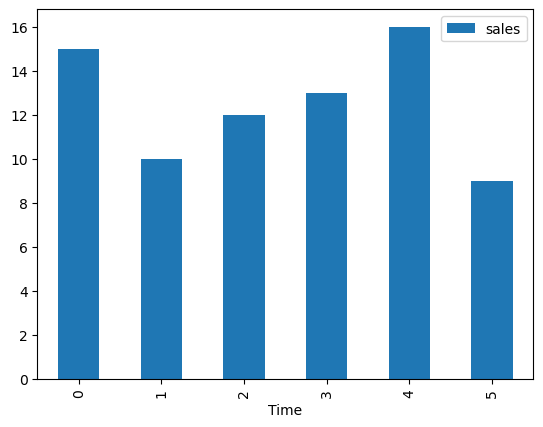

In [22]:
file_path = input("Enter file path: ")
df = pd.read_csv(file_path)
df.plot.bar(xlabel='Time' , stacked=True)

# question 11

In [25]:
student_data = {"student_ID" : ['1' , '2' , '3' , '4' , '5' , '6' , '7' , '8' , '9' ,'10' ] , 
        "Test_Scores" : ['85' , '90' , '80' , '75 ' , '85' , '82' , '78' , '85' ,'90' ,'85']}
df = pd.DataFrame(student_data)
df.to_csv("student_data.csv" , index=False)

In [33]:
file_path = input("Enter file path: ")
df = pd.read_csv(file_path)

l=[]
l.append(df['Test_Scores'].mean())
l.append(df['Test_Scores'].median())
l.append(df['Test_Scores'].mode())

data = {"Statistic" : ["Mean" , "Median" , "Mode"] , "Value" : [i for i in l] }

df1 = pd.DataFrame(data)
df1


Enter file path:  student_data.csv


,Statistic,Value
0,Mean,83.5
1,Median,85.0
2,Mode,"0 85 Name: Test_Scores, dtype: int64"
